In [1]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from math import *
from matplotlib.pylab import *
import sympy as sy
sy.init_printing() # à utiliser que si on veut un joli rendu à exploiter en Tex 
#sans le init_printing vous aurez les résultats au format python

Autosaving every 300 seconds


# Construction des matrices en symbolique
On utilise ici la librairie sympy pour faire du calcul symbolique (exact et avec paramètre éventuellement) en algèbre linéaire. Cette librairie est très différente de numpy qui permet de faire du calcul numérique (donc approché) de façon efficace en temps calcul sur des systèmes de grande taille.

Afin d'éviter toute confusion avec numpy, la librairie sympy a été importé "as sy" de sorte qu'il faudra préfixé par "sy." toutes les commandes sympy dont certaines portent le même nom que des commandes numpy.


L'assemblage des matrices se fait avec la commande Matrix à la manière de array avec numpy. Les commandes eye, ones, zeros sont similaires aux commandes numpy du même nom, mais il ne faut pas les confondre.

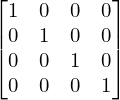

In [2]:
sy.eye(4)


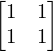

In [3]:
sy.ones(2,2)

## Résolution de système
Afin de résoudre des systèmes avec une factorisation LU, on a la commade suivante. Notez que la matrice du système est 3x4 ici car le second memebre du système est rangé en dernière colonne. Le premier bloc 3x3 correspond aux coefficient de la matrice du système linéaire.

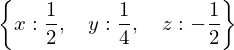

In [4]:
A=sy.Matrix([[1, 2, 0, 1],[3, 2, 2, 1],[2, 0, 0, 1]])
x, y, z, a, b, c = sy.symbols(' x y z a b c')
#on rajoute le sm en dernière colonne
sy.solve_linear_system_LU(A,[ x,y,z])

L'intérêt, avec le symbolique, est de résoudre des systèmes dont les coefficients sont des paramètres.

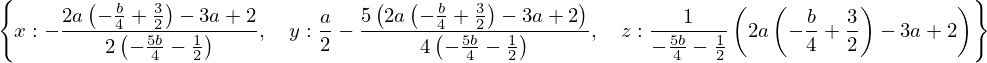

In [55]:
x, y, z, a, b, c = sy.symbols('x y z a b c')
A=sy.Matrix([[1, 2, 3, a],[3, b, 1, 2],[2, 0, 1,0]])
sy.solve_linear_system_LU(A,[x,y,z])

## Noyau et image d'une matrice
Les méthodes "columnspace" et "nullspace" appliquées à un objet Matrix de sympy permettent de calculer l'image et le noyau de l'application linéaire.

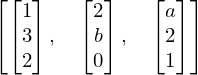

In [6]:
#columnspace renvoie des vecteurs libres qui engendrent l'image de A
# leur nombre est donc le rang de la matrice
B=sy.Matrix([[1, 2, a],[3, b, 2],[2, 0, 1]])
B.columnspace()

noyau


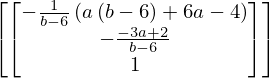

In [7]:
#pour le noyau, on utilise nullspace
C=sy.Matrix([[1, 2, a],[3, b, 2],[4, 2+b, a+2]])
print("noyau")
C.nullspace()

image


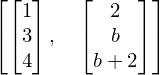

In [8]:
print("image")
C.columnspace()

## Diagonalisation
En symbolique, on peut également calculer exactement les matrices de passage et diagonale avec la méthode "diagonalize" appliquée à un objet Matrix.

diagonalisation
passage


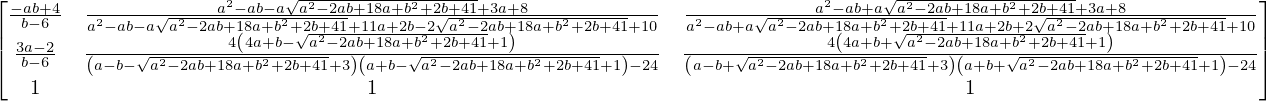

In [9]:
print("diagonalisation")
P,D=C.diagonalize()
print("passage")
#P.transpose()
sy.simplify(P)

matrice diagonalisée


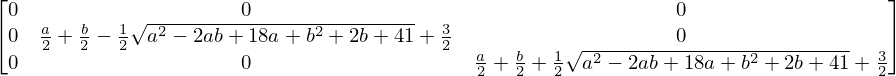

In [10]:
print("matrice diagonalisée")
D

On vérifie que 
$$
C=PDP^{-1}.
$$
Attention, le calcul de l'inverse est long en symbolique.

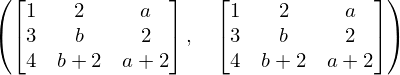

In [11]:
sy.simplify(P*D*P**-1),C

On pense à réutiliser les résultats produits en mathjax pour les copier coller au format Tex dans le corps d'une cellule Markdown, comme ici. 
La diagonalisation non montre que les valeurs propres sont $0$, $\frac{a}{2} + \frac{b}{2} - \frac{\sqrt{a^{2} - 2 a b + 18 a + b^{2} + 2 b + 41}}{2} + \frac{3}{2}$ et $\frac{a}{2} + \frac{b}{2} + \frac{\sqrt{a^{2} - 2 a b + 18 a + b^{2} + 2 b + 41}}{2} + \frac{3}{2}$ (obtenus par copier-coller)

## Déterminant, valeurs propres et vecteurs propres
Ces outils sont également proposés sous forme de méthode appliqué à l'objet Matrix.

In [17]:
B.det()

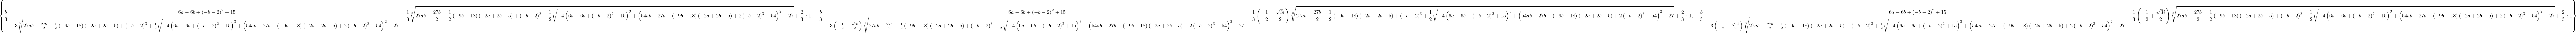

In [13]:
B.eigenvals()

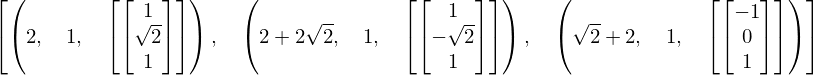

In [18]:
C=sy.Matrix([[2, -1, 0],[-1, 2, -1],[0, -1, 2]])
C=C+sy.sqrt(2)*sy.eye(3)
#eigenvects renvoie la valeur propre avec multiplicité et vecteurs propres.
C.eigenvects()

(x - 2)*(x**2 - 3*sqrt(2)*x - 4*x + 8 + 6*sqrt(2))


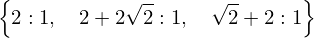

In [19]:
p=C.charpoly(x)
print(sy.factor(p))
sy.roots(p)

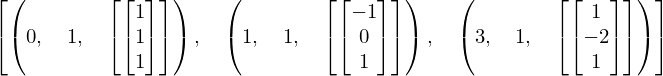

In [20]:
C=sy.Matrix([[1, -1, 0],[-1, 2, -1],[0, -1, 1]])
#eigenvects renvoie la valeur propre avec multiplicité et vecteurs propres.
C.eigenvects()

# Exercices

## Exercice 1
Soit la matrice paramétrée par $a\in \mathbb R$,
$$R=\left[\begin{matrix}2 & -1 & 0\\-1 & 2 & -1\\0 & -1 & - a + 2\end{matrix}\right].$$
Trouver une condition sur $a$ pour que les valeurs propres de $R$ soient toutes strictement positives.
## Exercice 2
On définit $S$ comme
$$S=\left[\begin{matrix}1 & 0 & 0\\0 & \frac 1 2 & -\frac{\sqrt 3} 2\\0 & \frac{\sqrt 3} 2& \frac 1 2\end{matrix}\right].$$
Trouver le plus petit $p>0$ entier tel que $S^p$ est l'identité. Pouvait-on déviner le résultat?

Vérifier que $S^{-1}=S^t$. Comment appelle-ton la propriété d'une telle matrice? Pourquoi ce résultat?
## Exercice 3
On définit $T$ paramétré par $a\in \mathbb R$ comme
$$T=\left[\begin{matrix}0 & 1 & -1 & 2\\-1 & 0 & 1&  -1\\1 & -1 & 0 & a\\-2 & 1  & -a  & 0 \end{matrix}\right].$$
Calculer $(Tu,u)$ où $u\in \mathbb R^4$ et $(.,.)$ désigne le produit scalaire de $\mathbb R^4$.

Justifier pourquoi on obtient ce résultat.

Observer que les valeurs propres de $T$ sont imaginaires pures. Le démontrer pour toute matrice anti-symétrique à coefficient réel.
## Exercice 4
On considère la suite de $\mathbb R^4$ définie par
$$
\left(\begin{matrix}w^{n+1}\\x^{n+1}\\y^{n+1}\\z^{n+1}\end{matrix}\right)=T\left(\begin{matrix}w^{n}\\x^{n}\\y^{n}\\z^{n}\end{matrix}\right),
$$
et de premièr itéré donné quelconque, avec $T$ la matrice introduite à la question précédente.

Vérifier sur quelques itérés que deux itérés successifs sont orthogonaux.

Le démontrer.

## Exercice 5
On considère la suite de $\mathbb R^4$ définie par
$$
(Id-T)\left(\begin{matrix}w^{n+1}\\x^{n+1}\\y^{n+1}\\z^{n+1}\end{matrix}\right)=(Id+T)\left(\begin{matrix}w^{n}\\x^{n}\\y^{n}\\z^{n}\end{matrix}\right),
$$
et de premièr itéré donné quelconque, $T$ la matrice introduite à la question précédente et $Id$ la matrice identité.

Calculer les 50 premiers itérés ainsi que la norme Euclidienne de chaque itéré. Qu'observe-t-on quant à la norme euclidienne de chaque itéré? Démontrer mathématiquement ce que vous observez.

La suite est-elle convergente? 

## Exercice 6
On considère la suite de $\mathbb R^2$ définie par
$$
\left(\begin{matrix}x^{n+1}\\y^{n+1}\end{matrix}\right)=V\left(\begin{matrix}x^{n}\\y^{n}\end{matrix}\right),
$$
et de premièr itéré donné quelconque avec la matrice $V$ définie par
$$V=\frac 9 {10}\left[\begin{matrix} \cos(\frac 1 {10}) & \sin(\frac 1 {10})\\-\sin(\frac 1 {10})& \cos(\frac 1 {10}) \end{matrix}\right].$$
Tracer les 300 premiers itérés de cette suite dans le plan $\mathbb R^2$ et expliquer le tracé obtenu.

Démontrer la convergence vers $0$ de la suite.